# Generating atlas-like treemaps

If you haven't read the Tutorial notebook before (in the same directory), go read that first to get a basic understanding of what's going on! This example is in a very similar vein, but for product spaces.

In [106]:
import sys
sys.path.append("./modules")
import d3plus2 as d3plus
from d3plus2 import RawJavascript
import pandas as pd
%matplotlib inline

In [2]:
# Read in the data
df = pd.read_stata("/Users/makmana/Downloads/QUALITY_DATASET_imf (1).dta")

In [3]:
# Take a peek
df.head()

,year,sitc4,ename,density_q_knn_p100,density_q_rca_knn_p100,value,sitc4_s,exports,cexports,pexports,...,M,density,eci,pci,diversity,ubiquity,coi,cog,qual,log_initial_qual
0,1963.0,11,AFG,0.000000,0.000000,0.000000,0011,0.000000,0.000000e+00,358708.75,...,NaN,NaN,NaN,-0.156474,NaN,NaN,NaN,NaN,NaN,NaN
1,1963.0,11,ARG,0.361350,0.797273,37281.734375,0011,37281.734375,1.042991e+06,358708.75,...,1.0,0.192790,0.286416,-0.156474,62.0,11.0,-0.287431,-0.000000,0.679955,-0.385729
2,1963.0,11,AUS,0.411583,0.842494,560.973999,0011,560.973999,1.686424e+06,358708.75,...,0.0,0.168001,0.426944,-0.156474,66.0,11.0,-0.016589,-0.146432,NaN,NaN
3,1963.0,11,AUT,0.510770,0.998647,28056.955078,0011,28056.955078,4.091029e+05,358708.75,...,1.0,0.433105,2.045712,-0.156474,182.0,11.0,2.967023,-0.000000,0.895671,-0.110182
4,1963.0,11,BEN,0.049978,0.568286,56.187000,0011,56.187000,1.328092e+04,358708.75,...,0.0,0.040642,-0.419937,-0.156474,24.0,11.0,-0.353137,-0.174309,NaN,NaN


In [4]:
df.columns

Index(['year', 'sitc4', 'ename', 'density_q_knn_p100',
       'density_q_rca_knn_p100', 'value', 'sitc4_s', 'exports', 'cexports',
       'pexports', 'wexports', 'm', 'rca', 'M', 'density', 'eci', 'pci',
       'diversity', 'ubiquity', 'coi', 'cog', 'qual', 'log_initial_qual'],
      dtype='object')

In [154]:
# Get a 1-digit level categorization 
df["sitc1"] = df["sitc4_s"].str.slice(0,1)

# Add quality fields that are binned into groups
df["qual_binned"] = pd.cut(df.qual, bins=5, labels=["1", "2", "3", "4", "5"]).astype(float)
df["log_qual_binned"] = pd.cut(df.log_initial_qual, bins=5, labels=["1", "2", "3", "4", "5"]).astype(float)

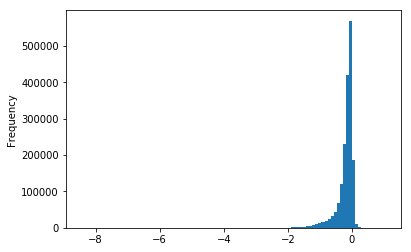

In [107]:
df.log_initial_qual.plot(kind="hist", bins=100)

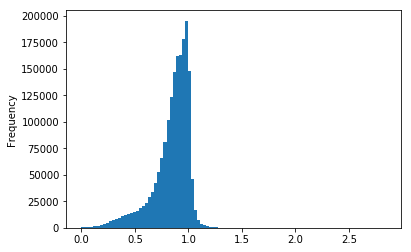

In [108]:
df.qual.plot(kind="hist", bins=100)

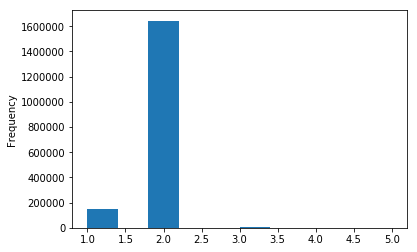

In [152]:
df.qual_binned.plot(kind="hist")

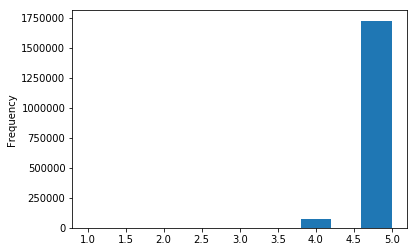

In [153]:
df.log_qual_binned.plot(kind="hist")

In [157]:
# Load SITC rev 1 product codes
sitc = pd.read_excel("./sourcedata/SITC_rev1.xls", names=["code", "revision", "name"], header=None)
sitc = sitc[["code", "name"]]

### Create a subset of the data for USA in 2010

In [146]:
usa_2010 = df[(df.ename == "USA") & (df.year == 2010)]
usa_2010 = usa_2010.merge(sitc, left_on="sitc4_s", right_on="code", how="left") # merge in names
usa_2010.head() # Check to see it's all OK?

,year,sitc4,ename,density_q_knn_p100,density_q_rca_knn_p100,value,sitc4_s,exports,cexports,pexports,...,ubiquity,coi,cog,qual,log_initial_qual,sitc1,qual_binned,log_qual_binned,code,name
0,2010.0,11,USA,0.765605,1.083891,138903.640625,0011,138903.640625,946141696.0,7349222.500,...,34.0,0.103421,-0.074587,0.331734,-1.103421,0,1,1,0011,Bovine cattle including buffaloes
1,2010.0,12,USA,0.910314,1.296516,11104.272461,0012,11104.272461,946141696.0,1259107.250,...,22.0,0.103421,-0.197578,0.669432,-0.401325,0,1,1,0012,"Sheep,lambs and goats"
2,2010.0,13,USA,0.887760,1.447102,7045.186035,0013,7045.186035,946141696.0,3214806.250,...,15.0,0.103421,0.078481,NaN,NaN,0,NaN,NaN,0013,Swine
3,2010.0,14,USA,0.754343,1.143977,121043.708984,0014,121043.710938,946141696.0,1962204.500,...,24.0,0.103421,-0.021858,0.742586,-0.297616,0,1,1,0014,"Poultry,live"
4,2010.0,15,USA,0.759908,1.147094,133405.281250,0015,133405.281250,946141696.0,1045984.125,...,15.0,0.103421,-0.000000,0.775085,-0.254782,0,2,2,0015,"Horses,asses,mules and hinnies"


### Tips:
- d3plus color options documentation at: https://github.com/alexandersimoes/d3plus/wiki/Visualizations#color
- You can substitute raw javascript into any field using field=RawJavascript("""blahblahblah""")

In [156]:
# Regular treemap of product exports
viz = d3plus.Treemap(
    id=["sitc1","sitc4_s"],
    value="pexports",
    name="name",
    color="sitc1",
    tooltip=["name", "sitc1", "sitc4_s", "pexports"]
)
viz.draw(usa_2010)

<IPython.core.display.Javascript object>

In [134]:
# Treemap colored by log(quality)
viz = d3plus.Treemap(
    id=["sitc1","sitc4_s"],
    value="pexports",
    name="name",
    color="log_initial_qual",
    tooltip=["name", "sitc1", "sitc4_s", "pexports"]
)
viz.draw(usa_2010)

<IPython.core.display.Javascript object>

In [135]:
# Treemap colored by quality
viz = d3plus.Treemap(
    id=["sitc1","sitc4_s"],
    value="pexports",
    name="name",
    color="qual",
    tooltip=["name", "sitc1", "sitc4_s", "pexports"]
)
viz.draw(usa_2010)

<IPython.core.display.Javascript object>

In [136]:
# Treemap colored by quality with d3plus color scale modifications
viz = d3plus.Treemap(
    id=["sitc1","sitc4_s"],
    value="pexports",
    name="name",
    color=RawJavascript("""{
      "range": [ "white" , "gray", "red" ],
      "heatmap": [ "white" , "red" ],
      "value": "qual"
    }"""),
    tooltip=["name", "sitc1", "sitc4_s", "pexports"]
)
viz.draw(usa_2010)

<IPython.core.display.Javascript object>

In [137]:
# Treemap colored by binned quality metric
viz = d3plus.Treemap(
    id=["sitc1","sitc4_s"],
    value="pexports",
    name="name",
    color="log_qual_binned",
    tooltip=["name", "sitc1", "sitc4_s", "pexports"]
)
viz.draw(usa_2010)

<IPython.core.display.Javascript object>

In [150]:
# Treemap colored by binned quality metric
viz = d3plus.Treemap(
    id=["sitc1","sitc4_s"],
    value="pexports",
    name="name",
    color="qual_binned",
    tooltip=["name", "sitc1", "sitc4_s", "pexports"]
)
viz.draw(usa_2010)

<IPython.core.display.Javascript object>

In [149]:
# Treemap grouped and colored by quality metric
viz = d3plus.Treemap(
    id=["qual_binned","sitc4_s"],
    value="pexports",
    name="name",
    color="qual_binned",
    tooltip=["name", "sitc1", "sitc4_s", "pexports"]
)
viz.draw(usa_2010)

<IPython.core.display.Javascript object>

In [148]:
# Save
open("./test_viz.html", "w+").write(viz.dump_html(subset))

358277

For more examples, see the Tutorial notebook!